# An Introduction to Linear Algebra for Quantum Computing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

### Introduction

Linear algebra is the language of quantum computing. It is therefore crucial to develop a good understanding of the basic mathematical concepts that linear algebra is built upon, in order to arrive at many of the amazing and interesting constructions seen in quantum computation. The goal of this section is to create a foundation of introductory linear algebra knowledge, upon which the reader can build during their study of quantum computing.

### Vectors and Vector Spaces

We will start our investigation into introductory linear algebra by first discussing one of the most important mathematical quantities in quantum computation: the vector.

Formally, a **vector** $|v\rangle$ is defined as elements of a set known as a vector space. A more intuitive and geometric definition is that a vector "is a mathematical quantity with both direction and magnitude". For instance, consider a vector with $x$ and $y$ components of the form $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$. This vector can be visualized as an arrow pointing in the direction of $3$ units down the $x$ axis and $5$ units up the $y$ axis:

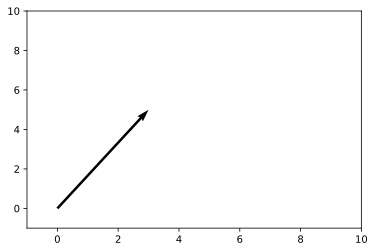

In [2]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

Note that "tail" of the vector doesn't have to be positioned at the origin; it only needs to point in the correct direction. 

In quantum computing, we often deal with **state vectors**, which are simply vectors that point to a specific point in space that corresponds to a particular quantum state. This can be visualized using a Bloch sphere. For instance, a vector representing the state of a quantum system could look something like this arrow, enclosed inside the Bloch sphere, which is the so-called "state space" of all possible points to which our state vectors can "point":

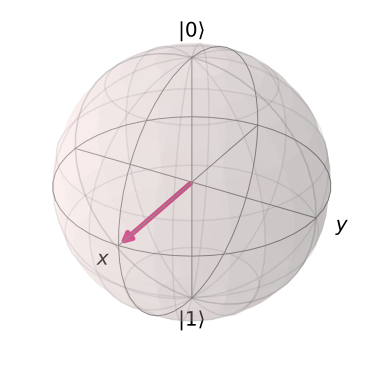

In [3]:
plot_bloch_vector([1, 0, 0])

This particular state corresponds to an even superposition between $|0\rangle$ and $|1\rangle$ (the arrow is halfway between $|0\rangle$ at the top and $|1\rangle$ at the bottom of the sphere). Our vectors are allowed to rotate anywhere on the surface of the sphere, and each of these points represents a different quantum state.

Let's revisit our more formal definition of a vector, which is that a vector is an element of a vector space. We must now define a vector space. A **vector space** $V$ over a **field** $F$ is a set of objects (vectors), where two conditions hold. Firstly, **vector addition** of two vectors $|a\rangle, \ |b\rangle \ \in \ V$ will yield a third vector $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$, also contained in $V$. The second condition is that **scalar multiplication** between some $|a\rangle \ \in \ V$ and some $n \ \in \ F$, denoted by $n|a\rangle$, is also contained within $V$.

We will now clarify this previous definition by working through a basic example. Let us demonstrate that the set $\mathbb{R}^2$ over the field $\mathbb{R}$ is a vector space. We assert that

<br>


$$\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_2 \\ y_2 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \\ y_1 \ + \ y_2 \end{pmatrix}$$


<br>

is contained within $\mathbb{R}^2$. This is evidently the case, as the sum of two real numbers is a real number, making both components of the newly-formed vector real numbers; thus, the vector is contained in $\mathbb{R}^2$ by definition. We also assert that:

<br>


$$n |v\rangle \ = \ \begin{pmatrix} nx \\ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$


<br>

This is true as well, as the product of a real number and a real number is a real number, making the entire new vector real, and thus proving this statement.

### Matrices and Matrix Operations

Let's turn our attention to another fundamental concept: a **matrix**. Matrices are mathematical objects that transform vectors into other vectors:

<br>


$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$


<br>

Generally, matrices are written as "arrays" of numbers, looking something like this:

<br>


$$M \ = \ \begin{pmatrix} 1 & -2 & 3 \\ 1 & 5i & 0 \\ 1 \ + \ i & 7 & -4 \end{pmatrix}$$


<br>

We can "apply" a matrix to a vector by performing matrix multiplication. In general, matrix multiplication between two matrices involves taking the first row of the first matrix, and multiplying each element by its "partner" in the first column of the second matrix (the first number of the row is multiplied by the first number of the column, second number of the row and second number of column, etc.). The sum of these new numbers becomes the first element of the first row of the new matrix. To fill in the rest of the first row, we repeat this process for the second, third, etc. columns of the second matrix. Then we take the second row of the first matrix, and repeat the process for each column of the second matrix, to produce the second row. We perform this process until we have used all rows of the first matrix. The resulting matrix is our new matrix. Here is an example:

<br>


$$\begin{pmatrix} 2 & 0 \\ 5 & -1 \end{pmatrix} \begin{pmatrix} -3 & 1 \\ 2 & 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)(-3) + (0)(2) & (2)(1) \ + \ (0)(1) \\ (5)(-3) + (-1)(2) & (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 & 2 \\ -17 & 4 \end{pmatrix}$$


<br>

To perform a quantum computation, we have some quantum state vector we manipulate by applying a matrix to that vector. A vector is simply a matrix with one column. To apply a matrix to a vector, therefore, we follow the same matrix multiplication procedure described above. We manipulate qubits in our quantum computer by applying sequences of **quantum gates**. Each quantum gate can be expressed as a matrix that can be applied to state vectors, thus changing the state. For instance, a commonly seen quantum gate is the Pauli-X gate, which is represented by the following matrix:

<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>

This gate acts similarly to the classical NOT logic gate. It maps the computational basis state $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$ (it "flips" the state). We write the two basis states as column vectors:

<br>


$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$


<br>

When we apply this matrix to each of the vectors:

<br>


$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} (0)(1) \ + \ (1)(0) \\ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$


<br>


$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} (0)(0) \ + \ (1)(1) \\ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$


<br>

The matrix acts on the state vectors as expected.

Within quantum computation, we often encounter two important types of matrices: **Hermitian** and **Unitary** matrices. The former is more important in the study of quantum mechanics, but is still necessary to discuss in a study of quantum computation. The latter is of unparalleled importance in both quantum mechanics and quantum computation. If you take away only one concept from this section on linear algebra, it should be the concept of a unitary matrix.

A Hermitian matrix is simply a matrix that is equal to its **conjugate transpose** (denoted with a $\dagger$ symbol).  This means that flipping the sign of a Hermitian matrix's imaginary components, then reflecting its entries along its main diagonal (from the top left to bottom right corners), produces an equal matrix. For instance, the Pauli-Y matrix, commonly used in quantum computation, is Hermitian:

<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -(i) \\ -(-i) & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ = \ \sigma_y$$


<br>

Notice how we switched the places of the $i$ and the $-i$ (as we reflect across the main diagonal, the zeroes remain unchanged), and then flipped the sign. 

A unitary matrix is very similar. Specifically, it is a matrix such that the **inverse matrix** is equal to the conjugate transpose of the original matrix.

The inverse of some matrix $A$, denoted as $A^{-1}$, is a matrix such that:

<br>


$$A^{-1} A \ = \ A A^{-1} \ = \ \mathbb{I}$$


<br>

where $\mathbb{I}$ is the identity matrix. The identity matrix has $1$s along the main diagonal (top left to bottom right), and $0$s in all other places. It is called the identity matrix because it acts trivially on any other matrix (it has no effect). You can prove this on your own by multiplying an identity matrix by any other matrix.  

When matrices get larger than $2 \ \times \ 2$, calculating the inverse becomes sufficiently complicated that it is usually left to computers to calculate. For a $2 \ \times \ 2$ matrix, the inverse is defined as:

<br>
$$A \ = \ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix},$$
<br>

where $\text{det} \ A$ is the **determinant** of the matrix. In the $2 \ \times \ 2$ case, $\text{det} \ A \ = \ ad \ - \ bc$.

Calculating inverse matrices is rarely important in quantum computing. Since most of the matrices we encounter are unitary, we can assume that the inverse is simply given by taking the conjugate transpose.

Let's look at a basic example. The Pauli-Y matrix, in addition to being Hermitian, is also unitary (it is equal to its conjugate transpose, which is also equal to its inverse; therefore, the Pauli-Y matrix is its own inverse!). We can verify that this matrix is in fact unitary:

<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) & (0)(-i) \ + \ (-i)(0) \\ (i)(0) \ + \ (0)(i) &  (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ = \ \mathbb{I}$$


<br>

The reason unitary matrices are important will become more apparent in the section on Hilbert spaces, and more so in the quantum mechanics subtopic of this textbook. The basic idea is that evolution of a quantum state by application of a unitary matrix "preserves" the norm (magnitude) of the quantum state.

### Spanning Sets, Linear Dependence, and Bases

We are now in a position to discuss the construction of vector spaces. Consider some vector space $V$. We say that some set of vectors $S$ spans a subspace $V_S \ \subset \ V$ (subset closed under vector space operations) of the vector space, if we can write any vector in the subspace as a **linear combination** of vectors contained within the spanning set. 

A linear combination of some collection vectors $|v_1\rangle, \ ..., \ |v_n\rangle$ in some vector space over a field $F$ is defined as an arbitrary sum of these vectors (which of course will be another vector that we will call $|v\rangle$):

<br>


$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i\rangle$$


<br>

where each $f_i$ is some element of $F$. If we have a set of vectors that spans a space, we are saying that **any other vector** in the vector space can be written as a linear combination of these vectors.

A set of vectors $|v_1\rangle, \ ..., \ |v_n\rangle$ is said to be **linearly dependent** if there exist corresponding coefficients for each vector, $b_i \ \in \ F$, such that:

<br>

$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0,$$

<br>

where at least one of the $b_i$ coefficients is non-zero. This is equivalent to the more intuitive statement that "the set of vectors can be expressed as linear combinations of each other". For example, let us have the set $ \{|v_1\rangle, \ ..., \ |v_n\rangle\} $ along with the corresponding coefficients $ \{ b_1, \ ..., \ b_n \} $, such that the linear combination is equal to $0$. Since there is at least one vector with a non-zero coefficient, we choose a term in the linear combination $b_a |v_a\rangle$:

<br>


$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i, \ i \ \neq \ a} \ c_i |v_i\rangle$$


<br>

In the case that $b_a$ is the only non-zero coefficient, it is necessarily true that $|v_a\rangle$ is the null vector, automatically making the set linearly dependent. If this is not the case, $|v_a\rangle$ has been written as a linear combination of non-zero vectors, as was shown above. To prove the converse, we assume that there exists some vector $|v_a\rangle$ in the subspace $|v_1\rangle, ..., \ |v_n\rangle$ that can be written as a linear combination of other vectors in the subspace. This means that:

<br>

$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$

<br>

where $s$ is an index that runs over a subset of the subspace. It follows that:

<br>


$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ = \ 0$$


<br>

For all vectors in the subspace that are not included in the subset indexed by $s$, we set their coefficients, indexed by $q$, equal to $0$. Thus,

<br>

$$|v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$

<br>

which is a linear combination of all elements in the subspace $|v_1\rangle, \ ..., \ |v_n\rangle$. This is equal to $0$, thus completing the proof that the two definitions of linear dependence imply each other.

Let's now consider a basic example. Consider the set of two vectors in $\mathbb{R}^2$, consisting of $|a\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|b\rangle \ = \ \begin{pmatrix} 2 \\ 0 \end{pmatrix}$. If we choose the field over our vector space to be $\mathbb{R}$, then we can create a linear combination of these vectors that equates to $0$. For example:

<br>


$$2|a\rangle \ - \ |b\rangle \ = \ 0$$


<br>

A set of vectors is said to be **linearly independent** if there is no vector in the set that can be expressed as a linear combination of all the others.

The notion of a **basis** is simply a **linearly independent spanning set**. In this sense, the basis of a vector space is the minimal possible set that spans the entire space. We call the size of the basis set the **dimension** of the vector space.

Bases and spanning sets are important because they allow us to "shrink down" vector spaces and express them in terms of only a few vectors. We can come to certain conclusions about our basis set that we can generalize to the entire vector space, simply because we know every vector in the space is just a linear combination of the basis vectors. 

In quantum computation, one of the bases that we often encounter is $|0\rangle, \ |1\rangle$. We can write any other qubit state as a linear combination of these basis vectors. For instance, the linear combination

<br>


$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$


<br>

represents a superposition between the $|0\rangle$ and $|1\rangle$ basis state, with equal probability of measuring the state to be in either one of the basis vector states (this is intuitive, as the "weight" or the "amount of each basis vector" in the linear combination is equal, both being scaled by $1/\sqrt{2}$).

### Hilbert Spaces, Orthonormality, and the Inner Product

Hilbert Spaces are one of the most important mathematical constructs in quantum mechanics and quantum computation. A Hilbert space can be thought of as the state space in which all quantum state vectors "live". The main difference between a Hilbert space and any random vector space is that a Hilbert space is equipped with an **inner product**, which is an operation that can be performed between two vectors, returning a scalar. 

In the context of quantum mechanics and quantum computation, the inner product between two state vectors returns a scalar quantity representing the amount to which the first vector lies along the second vector. From this, the probabilities of measurement in different quantum states (among other things) can be calculated (this will be discussed more in the quantum mechanics subtopic). 

For two vectors $|a\rangle$ and $|b\rangle$ in a Hilbert space, we denote the inner product as $\langle a | b \rangle$, where $\langle a |$ is equal to the conjugate transpose of $|a\rangle$, denoted $|a\rangle^{\dagger}$. Thus, the inner product between two vectors of the Hilbert space looks something like:

<br>

$$\langle a | b \rangle \ = \ \begin{pmatrix} a_1^{*} & a_2^{*} & ... & a_n^{*} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{pmatrix} \ = \ a_1^{*} b_1 \ + \ a_2^{*} b_2 \ + \ ... \ + \ a_n^{*} b_n$$

<br>

where $*$ denotes the complex conjugate of the vector.

One of the most important conditions for a Hilbert space representing a quantum system is that the inner product of a vector with itself is equal to one: $\langle \psi | \psi \rangle \ = \ 1$. This is the so-called normalization condition, which states that the length of the vector squared (each component of the vector is squared and summed together, by definition of the inner product) must be equal to one. The physical significance of this is that the length of a vector in a particular direction is representative of the "probability amplitude" of the quantum system with regards to measurement in that particular state. Obviously, the probability of the quantum system being measured in the state that it is in must be $1$ (after all, the sum of the probabilities of finding the quantum system in any particular state must equal $1$).

Let's consider the Bloch sphere:

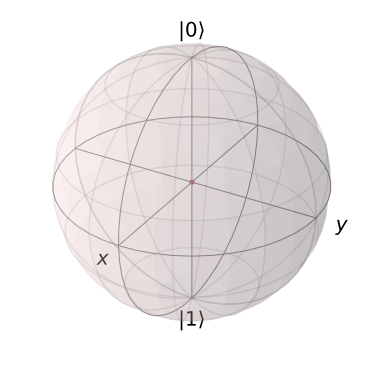

In [4]:
plot_bloch_vector([0, 0, 0])

The surface of this sphere, along with the inner product between qubit state vectors, is a valid Hilbert space. In addition, the normalization condition holds true, as the radius of the Bloch sphere is $1$, and thus the length squared of each vector must also equal $1$.

A final note regarding Hilbert spaces and the inner product is their relationship to **unitary matrices**. Unitary matrices are important in quantum computation because they **preserve the inner product**, meaning that no matter how you transform a vector under a sequence of unitary matrices, the normalization condition still holds true. This can be demonstrated in the following short proof:

<br>


$$\langle \psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\dagger} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$


<br>

This means that unitary evolution sends quantum states to other valid quantum states. For a single-qubit Hilbert space, represented by the Bloch sphere, unitary transformations correspond to rotations of state vectors to different points on the sphere, not changing the length of the state vector in any way.

### Outer Products and Tensor Products

Inner products aren't the only way to multiply vectors. Occasionally, we'll switch the order of the bra and ket in order to take the **outer product,** whose outcome is a matrix, rather than a single number. For two vectors $|a\rangle$ and $|b\rangle$ in a Hilbert space, we denote the outer product as $|a\rangle \langle b|$, where $\langle b |$ is equal to the conjugate transpose of $|b\rangle$, as before. This gets us:

<br>

$$| a \rangle \langle b | \ = \ \begin{pmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix} \begin{pmatrix} b_1^{*} & b_2^{*} & \cdots & b_n^{*} \end{pmatrix} \ = \begin{pmatrix} a_1 b_1^{*} & a_1 b_2^{*} & \cdots & a_1 b_n^{*} \\ a_2 b_1^{*} & a_2 b_2^{*} &  & \vdots \\ \vdots &  & \ddots & \vdots \\ a_n b_1^{*} & \cdots & \cdots & a_n b_n^{*} \end{pmatrix}$$


<br>

Outer products give us a way to represent quantum gates with bras and kets, rather than matrices. For example, take the Pauli-X gate:


<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>

We can represent this as the sum $|0\rangle \langle 1|$ + $|1\rangle \langle 0|$, since:

<br>

$$|0\rangle \langle 1| \ + \ |1\rangle \langle 0| \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \ = \ \sigma_x $$ 

<br>

The outer product is, in fact, a specific example of the more general **tensor product** used to multiply vector spaces together. 

Most often, you'll see the tensor product used to describe the shared state of two or more qubits. Notice here that the tensor product doesn't require taking one of the vector's conjugate transposes like the outer product does—we're multiplying two kets together instead of a ket and a bra. The tensor product of vectors $|a \rangle$ and $|b\rangle$, written $|a\rangle \otimes |b\rangle$ or $|ab\rangle$, equals: 

<br> 

$$ |a\rangle \otimes |b\rangle \ = \ \begin{pmatrix} a_{1} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \\ a_{2} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \end{pmatrix} \ = \begin{pmatrix} a_{1} b_{1} \\ a_{1} b_{2} \\ a_{2} b_{1} \\ a_{2} b_{2} \end{pmatrix} $$

<br>

If we want to act on the new vector produced by the tensor product of $|a \rangle$ and $|b\rangle$, we'll have to take the tensor product of the operators we hope to act on them with as well. The tensor product of matrices *A* and *B* equals:

<br>

$$ A \otimes B \ = \ \begin{pmatrix} a_{11} B & \cdots & a_{1n} B \\ \vdots & \ddots & \vdots \\ a_{m1} B & \cdots & a_{mn} B \end{pmatrix} $$

<br>

You can find examples of the tensor product in action [here.](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#1.-Representing-Multi-Qubit-States-)


### Eigenvectors and Eigenvalues

Consider the relationship of the form:

$$A |v\rangle \ = \ \lambda |v\rangle,$$

where $A$ is a matrix, and $\lambda$ is some number. If we are given some matrix $A$, and need to find the vectors $|v\rangle$ and numbers $\lambda$ that satisfy this relationship, we call these vectors **eigenvectors**, and their corresponding number multipliers **eigenvalues**. Eigenvectors and eigenvalues have very important physical significance in the context of quantum mechanics, and therefore quantum computation. Given some $A$, we exploit an interesting trick in order to find the set of eigenvectors and corresponding eigenvalues. Let us rearrange our equation as:

<br>


$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$


<br>

If we multiply both sides of this equation by the inverse matrix $(A \ - \ \lambda \mathbb{I})^{-1}$, we get $|v\rangle \ = \ 0$. This is an extraneous solution (we don't allow eigenvectors to be the null vector, or else any eigenvalue/matrix combination would satisfy the eigenvector-eigenvalue relationship). Thus, in order to find the allowed eigenvectors and eigenvalues, we have to assume that the matrix $(A \ - \ \lambda \mathbb{I})$ is **non-invertible**. Recall from earlier that the inverse of a matrix is of the form:

<br>
$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M),$$
<br>

where $F(M)$ is some new matrix (the particulars of which do not matter in this context) that depends on $M$. The part of this equation in which we are interested is the inverse of the determinant. If the determinant of the matrix $M$ is $0$, it follows that the inverse is undefined, and thus so is the inverse, making the matrix $M$ non-invertible. We therefore require that:

<br>


$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$


<br>

From this, we can determine $\lambda$, then we plug each value of $\lambda$ back into the original equation to get the eigenvectors. Let's do an example, and find the eigenvectors/eigenvalues of the Pauli-Z matrix, $\sigma_z$. We start with:

<br>


$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda & 0 \\ 0 & -1 \ - \ \lambda \end{pmatrix}  \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \ 1 \ - \ \lambda^2 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$


<br>

The equation, in terms of $\lambda$, that results when solving the determinant is called the **characteristic polynomial**. We can then plug each of these values back into the original equation. We'll start with $\lambda \ = \ 1$:

<br>


$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix}$$


<br>

$a$ can be any number, and $b$ is $0$; thus, the vector $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ forms a basis for all vectors that satisfy our relationship, and is therefore the eigenvector that corresponds to the eigenvalue of $1$. We do the same thing for $\lambda \ = \ -1$:

<br>


$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix}$$


<br>

This time, $b$ can be any number, and $a$ is $0$; thus, our basis vector (and our eigenvector corresponding to $-1$) is $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Notice how the eigenvectors of the Pauli-Z matrix are the quantum computational basis states $|0\rangle$ and $|1\rangle$. This is no coincidence. For instance, when we measure a qubit in the $Z$-basis, we are referring to a measurement that collapses the qubit's state into one of the eigenvectors of the Z matrix, either $|0\rangle$ or $|1\rangle$.

### Matrix Exponentials


The notion of a matrix exponential is a very specific yet extremely important concept. We often see unitary transformations in the form:

<br>
$$U \ = \ e^{i\gamma H},$$
<br>

where $H$ is some Hermitian matrix and $\gamma$ is some real number. It is fairly simple to prove that all matrices of this form are unitary. Taking the conjugate transpose of $U$, we get:

<br>


$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$


<br>

But since $H$ is Hermitian, we know that $H^{\dagger} \ = \ H$, thus:

<br>


$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$


<br>

You may wonder why a matrix inside of an exponential can still be considered a matrix.  The answer becomes clearer when we expand our exponential function as a Taylor series. Recall from calculus that a Taylor series is essentially a way to write any function as an infinite-degree polynomial, and the main idea is to choose the terms of the polynomial and center it at some point $x_0$ lying on the function we are trying to transform into the polynomial, such that the zeroth, first, second, third, etc. derivative is the same for both the original function and the polynomial. Thus, we write our Taylor series in the form:

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!},$$
<br>

where $g(x)$ is the polynomial, $f(x)$ is the original function, $f^{(n)}$ is the $n$-th derivative of $f$, and $x_0$ is the point at which we center the function. Since we are not approximating, $x_0$ doesn't matter, so for simplicity, we choose $x_0 \ = \ 0$, and the Taylor series becomes a Maclaurin series:

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$


<br>

If we choose $f(x) \ = \ e^x$, we can create an equivalent polynomial using the Maclaurin series. Since the derivative of $e^x$ is simply $e^x$, and evidently, $e^0 \ = \ 1$, we get:

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$


<br>

Thus, for some matrix, $i \gamma H$, we get:

<br>


$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$


<br>

Therefore, the exponential of a matrix is a matrix. It is an infinite sum of powers of matrices, which admittedly looks overly complex...but the point here is that the matrix exponential is indeed a matrix. 

We are now in a position to demonstrate a very important fact: if we have some matrix $B$ such that $B^2 \ = \ \mathbb{I}$ (this is called an **involutory matrix**), then:

<br>


$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$


<br>

We start with the Maclaurin series:

<br>


$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$


<br>

Notice that we can split the summation into an imaginary part and a real part, based on whether $n$ is even or odd in each term of the sum:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$


<br>

Now, let us find the Maclaurin series for both $\sin x$ and $\cos x$. We'll start with $f(x) \ = \ \sin x$:

<br>


$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>

The derivative of $\sin x$ is **cyclical** in a sense (each arrow represents taking the derivative of the previous function):

<br>


$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$


<br>

Since $\sin (0) \ = \ 0$ and $\cos (0) \ = \ 1$, all terms with even $n$ become $0$, and we get:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$


<br>

This looks similar to the odd term of our original equation. In fact, if we let $x \ = \ \gamma B$, they are exactly the same. We follow a process that is almost identical to show that the even terms are the same as the Maclaurin series for $f(x) \ = \ \cos x$:

<br>


$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>


$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$


<br>


$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$


<br>

Let us go back to the original equation. Recall that $B^2 \ = \ \mathbb{I}$. For any $n$, we have:

<br>


$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$


<br>


$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$


<br>

Substituting in this new information, we get:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$


<br>

This fact is extremely useful in quantum computation. Consider the Pauli matrices:

<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$


<br>


$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$


<br>

These matrices are among the fundamental "quantum gates" used to manipulate qubits. These operations are not only unitary, they are also **Hermitian** and **Involutory**. This means that a matrix of the form $e^{i \gamma \sigma_k} \ k \ \in \ \{x, \ y, \ z\}$ is not only a valid unitary matrix that can act upon a quantum state vector (a qubit), but it can be expressed using the sine-cosine relationship that we just proved. This is very powerful, and is seen throughout quantum computational theory, as gates of this type are used all the time.

One last important fact about matrix exponentials: if we have some matrix $M$, with eigenvectors $|v\rangle$ and corresponding eigenvalues $\lambda$, then:

<br>


$$e^{M} |v\rangle \ = \ e^\lambda |v\rangle$$


<br>

This one is much more straightforward to prove:

<br>


$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{M^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{\lambda^n |v\rangle}{n!} \ = \ e^\lambda |v\rangle$$


<br>

This fact is also very useful. When creating quantum circuits that simulate a certain Hamiltonian (especially for variational circuits), we frequently use gates of the form $e^{i \gamma \sigma_z}$. Since $|0\rangle$ and $|1\rangle$ are eigenvectors of $\sigma_z$, we can easily determine mathematically that $e^{i \gamma \sigma_z}$ will add a phase of $e^{i \gamma}$ to $|0\rangle$, and will add a phase of $e^{-i\gamma}$ to $|1\rangle$. We can then construct this gate in terms of $CNOT$ and phase/rotation gates fairly easily, as we know the mathematical outcome of the gate on each of the computational basis states.

This fact doesn't only apply to exponentials of the $\sigma_z$ gate. For example, we can determine the outcome of a gate of the form $e^{i \gamma \sigma_x}$ on the eigenvectors of $\sigma_x$, $(|0\rangle \ + \ |1\rangle)/\sqrt{2}$ and $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$. The same applies to exponentials of the $\sigma_y$ matrix.

## References
[1] Cayley, Arthur. “A Memoir on the Theory of Matrices.” Philosophical Transactions of the Royal Society of London, vol. 148, 1858, pp. 17–37. JSTOR.

[2] A New Branch of Mathematics: The Ausdehnungslehre of 1844 and Other Works: Hermann Grassmann, Lloyd C. Kannenberg: 9780812692761